In [177]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential # model
from tensorflow.keras.layers import Activation, Dense, LeakyReLU # Type of layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from functions import *
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

In [178]:
physical_devices = tf.config.experimental.list_physical_devices("GPU")
print("NUM GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

NUM GPUs Available:  1


In [179]:
df = pd.read_csv("assignment-files/wine.csv", index_col="index")
print(df.columns)
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'colour', 'target'],
      dtype='object')
(6497, 12)
(5315, 12)


In [180]:
y = df["target"].values
X = df.drop(["quality","target"], axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, stratify=y, shuffle=True)

In [181]:
smote = SMOTE(random_state=42, k_neighbors=2)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [182]:
scaler = StandardScaler().fit(X_train)
X_train_smote = scaler.transform(X_train_smote)
X_test = scaler.transform(X_test)

In [183]:
layer = Dense(units=40, activation="relu")
model = Sequential([
    Dense(units=40, activation="relu", input_shape=(10,)),
    *[*[layer]*10],
    Dense(units=2, activation="softmax")
])

In [184]:
learning_rate = 0.004
loss = "sparse_categorical_crossentropy"
metrics = "accuracy"
model.compile(optimizer=Adam(learning_rate=learning_rate),
                             loss=loss, metrics=metrics)

In [185]:
history = model.fit(x=X_train_smote, y=y_train_smote, batch_size=20, epochs=200,
          verbose=2, validation_split=0.1)

Epoch 1/200
240/240 - 1s - loss: 0.5766 - accuracy: 0.7009 - val_loss: 0.6451 - val_accuracy: 0.7692
Epoch 2/200
240/240 - 1s - loss: 0.5377 - accuracy: 0.7416 - val_loss: 0.6912 - val_accuracy: 0.7036
Epoch 3/200
240/240 - 1s - loss: 0.5267 - accuracy: 0.7451 - val_loss: 0.4887 - val_accuracy: 0.8293
Epoch 4/200
240/240 - 1s - loss: 0.5276 - accuracy: 0.7485 - val_loss: 0.5904 - val_accuracy: 0.7486
Epoch 5/200
240/240 - 1s - loss: 0.5226 - accuracy: 0.7527 - val_loss: 0.5061 - val_accuracy: 0.8086
Epoch 6/200
240/240 - 1s - loss: 0.5156 - accuracy: 0.7529 - val_loss: 0.5007 - val_accuracy: 0.7730
Epoch 7/200
240/240 - 1s - loss: 0.5157 - accuracy: 0.7531 - val_loss: 0.5227 - val_accuracy: 0.8143
Epoch 8/200
240/240 - 1s - loss: 0.5069 - accuracy: 0.7552 - val_loss: 0.4595 - val_accuracy: 0.8199
Epoch 9/200
240/240 - 1s - loss: 0.5107 - accuracy: 0.7581 - val_loss: 0.5229 - val_accuracy: 0.7805
Epoch 10/200
240/240 - 1s - loss: 0.5062 - accuracy: 0.7606 - val_loss: 0.5072 - val_accura

In [186]:
model.save("models/categorical_.h5")

In [187]:
predictions = model.predict(x=X_test, batch_size=100)
rounded_predictions = np.argmax(predictions, axis=-1)
cm = confusion_matrix(y_test,rounded_predictions)
plot_labels = ["bad","good"]

test loss, test acc: [0.6840947866439819, 0.7130761742591858]
(1063,)


<Figure size 1008x1008 with 0 Axes>

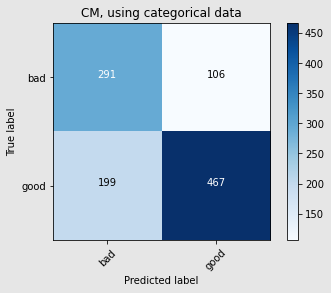

In [188]:
results = model.evaluate(X_test, y_test, batch_size=500, verbose=0)
print("test loss, test acc:", results)
print(y_test.shape)
plot_confusion_matrix(cm=cm, classes=plot_labels,
                      title= "CM, using categorical data")

Status at last epoch:
train_score = 0.3632912039756775
val_score   = 0.4140336811542511


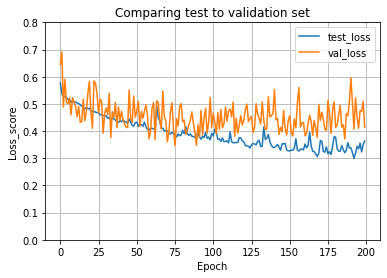

In [189]:
plot_and_print_loss(history)